# Summary

### In this notebook we evaluate all embedding types using Representational Similarity Analysis (RSA) with a focus on determining whether stereotypes align towards a concept of race. The goal is to evaluate for less similarity for any stereotype towards race (with higher values indicating more bias). This notebook adapts the work found in https://github.com/mlepori1/Unequal_Representations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import string 
from common.rsaUtils import get_RSA3 

%matplotlib inline

In [2]:
import os
curr_dr = os.getcwd() 

## Biased embeddings RSA scores

#### Word2Vec

In [3]:
w2v_biased =  get_RSA3(curr_dr+'/data/Word_Data_race.xlsx', 
        curr_dr  + "/data/harddebiased.w2v", 50)

White_Concept
word idx matrices created
matrices created
embeds generated
RSA White_Stereotypes White_Concept: 0.1238289937697884 STD: 0.0781087846403179
RSA Asian_Stereotypes White_Concept: -0.08950868443678434 STD: 0.05774204126070536
RSA Black_Stereotypes White_Concept: 0.027468726754635787 STD: 0.0696262198509664
Sign Test White_Stereotypes vs. Asian_Stereotypes: 1.5777218104420236e-30
Sign Test White_Stereotypes vs. Black_Stereotypes: 6.147806615047975e-11
Sign Test Black_Stereotypes vs. Asian_Stereotypes: 1.5777218104420236e-30

Asian_Concept
word idx matrices created
matrices created
embeds generated
RSA White_Stereotypes Asian_Concept: 0.0658219213552297 STD: 0.04621228338515963
RSA Asian_Stereotypes Asian_Concept: -0.038843174438145577 STD: 0.044599244424689384
RSA Black_Stereotypes Asian_Concept: 0.05526282925496189 STD: 0.05223092262577145
Sign Test White_Stereotypes vs. Asian_Stereotypes: 1.5777218104420236e-30
Sign Test White_Stereotypes vs. Black_Stereotypes: 0.4841184136

## Hard Debiased embeddings RSA scores

#### Word2Vec

In [4]:
w2v_hd_final = get_RSA3( curr_dr + '/data/Word_Data_race.xlsx', 
        curr_dr + "/data/data_vocab_race_hard_debias.w2v", 50)

White_Concept
word idx matrices created
matrices created
embeds generated
RSA White_Stereotypes White_Concept: 0.11459118330412435 STD: 0.07415323318152693
RSA Asian_Stereotypes White_Concept: -0.10839965787984056 STD: 0.05413536151375358
RSA Black_Stereotypes White_Concept: 0.06813926478565598 STD: 0.0656699868184081
Sign Test White_Stereotypes vs. Asian_Stereotypes: 1.5777218104420236e-30
Sign Test White_Stereotypes vs. Black_Stereotypes: 6.572240952992274e-05
Sign Test Black_Stereotypes vs. Asian_Stereotypes: 1.5777218104420236e-30

Asian_Concept
word idx matrices created
matrices created
embeds generated
RSA White_Stereotypes Asian_Concept: 0.070895007222171 STD: 0.045314763603537506
RSA Asian_Stereotypes Asian_Concept: -0.09818288743373013 STD: 0.04927514685022439
RSA Black_Stereotypes Asian_Concept: 0.057095143484815127 STD: 0.06011113966203825
Sign Test White_Stereotypes vs. Asian_Stereotypes: 1.5777218104420236e-30
Sign Test White_Stereotypes vs. Black_Stereotypes: 0.0568879336

### Double Hard Debiased embeddings RSA scores

#### Word2Vec

In [5]:
w2v_dhd_final = get_RSA3(curr_dr + '/data/Word_Data_race.xlsx', 
        curr_dr + "/data/doubleharddebiased.w2v", 50)

White_Concept
word idx matrices created
matrices created
embeds generated
RSA White_Stereotypes White_Concept: 0.11971321093126785 STD: 0.06162964427029418
RSA Asian_Stereotypes White_Concept: -0.07937315632058758 STD: 0.05460291924426641
RSA Black_Stereotypes White_Concept: 0.027966587762732153 STD: 0.05635143262272475
Sign Test White_Stereotypes vs. Asian_Stereotypes: 1.5777218104420236e-30
Sign Test White_Stereotypes vs. Black_Stereotypes: 1.312981552203585e-14
Sign Test Black_Stereotypes vs. Asian_Stereotypes: 1.5777218104420236e-30

Asian_Concept
word idx matrices created
matrices created
embeds generated
RSA White_Stereotypes Asian_Concept: 0.08412127715070702 STD: 0.04487762396314863
RSA Asian_Stereotypes Asian_Concept: -0.07594907075729573 STD: 0.04750319041327509
RSA Black_Stereotypes Asian_Concept: 0.024485780493285297 STD: 0.0490234049055148
Sign Test White_Stereotypes vs. Asian_Stereotypes: 1.5777218104420236e-30
Sign Test White_Stereotypes vs. Black_Stereotypes: 2.70276252

## Visualizations

In [6]:
results = []
for lis in w2v_biased: 
    lis.append(lis[1][0]+"S_"+lis[2][0]+"C")
    lis.append("Biased")
    results.append(lis)
for lis in w2v_hd_final: 
    lis.append(lis[1][0]+"S_"+lis[2][0]+"C")
    lis.append("Hard Debiased")
    results.append(lis)
for lis in w2v_dhd_final: 
    lis.append(lis[1][0]+"S_"+lis[2][0]+"C")
    lis.append("Double Hard Debiased")
    results.append(lis)

In [7]:
import pandas as pd
df = pd.DataFrame(results,
                       columns=['RSA', 'Stereotypes', 'Concept', 'Stereotypes and Concept', 'Bias' ])

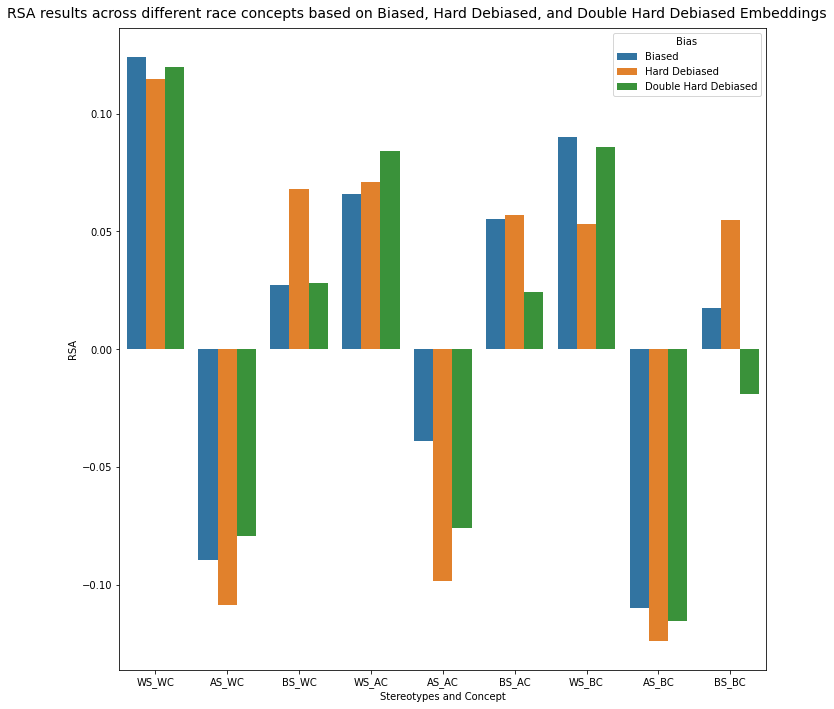

In [8]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
plt.suptitle(
    "RSA results across different race concepts based on Biased, Hard Debiased, and Double Hard Debiased Embeddings",
    fontsize=14,
)
ax = sns.barplot(x="Stereotypes and Concept", y="RSA", hue="Bias", data=df)
plt.tight_layout()
plt.show()